#treat as 
    - Time Series
    -Images
    
package: Torch audio
    
Converting Audio to Imgages using FFT (Frequency and time domain -- Spectrum)

#Resnet

Problem: training a computer vision to solve complicated problems
    
    reality -- deeper network didn't improve performance
    
    solution: create a bypass
        
        --context??

In [19]:
#Inception

In [20]:
#Packages
import torch
import torchvision.transforms as transforms
import torchvision
import matplotlib.pyplot as plt
import numpy as np
import torch.nn as nn
from sklearn.metrics import accuracy_score    
import torch.nn.functional as F
from sklearn.metrics import accuracy_score, confusion_matrix

In [21]:
BATCH_SIZE = 5
EPOCHS = 15

In [22]:
#Transform and load data
transform = transforms.Compose([
    transforms.Resize((50,50)),
    transforms.Grayscale(num_output_channels=1),
    #transforms.CenterCrop(200),
    #transforms.RandomHorizontalFlip(),
    #transforms.FiveCrop(200),
    transforms.ToTensor(),
    transforms.Normalize((0.5,),(0.5,))
 ])

In [23]:
ds_train = torchvision.datasets.ImageFolder(root='data2/train',transform=transform)
ds_test =  torchvision.datasets.ImageFolder(root='data2/test',transform=transform)

train_loader = torch.utils.data.DataLoader(ds_train, batch_size=BATCH_SIZE, shuffle=True)
test_loader = torch.utils.data.DataLoader(ds_test, batch_size=BATCH_SIZE, shuffle=True)

In [24]:
def imshow(img):
    img = img / 2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1,2,0)))
    plt.show() 

In [25]:
dataiter = iter(train_loader)
#next(dataiter)[0].shape
images, labels = next(dataiter)

In [26]:
imshow(torchvision.utils.make_grid(images, nrow=2))
print(labels)images.shape
#labels.shape

In [27]:
images.shape

In [28]:
class MultiClassificationModel(nn.Module):
    
    def __init__(self) -> None:
        super().__init__()
        self.conv1 = nn.Conv2d(1,6,3)
        self.pool = nn.MaxPool2d(2,2)
        self.conv2 = nn.Conv2d(6,16,3)
        #self.conv3 = nn.Conv2d(16,20,3)
        self.fc1 = nn.Linear(16*11*11,128)
        self.fc2 = nn.Linear(128,64)
        self.fc_out = nn.Linear(64,3) #
        self.flatten = nn.Flatten()
        self.softmax = nn.LogSoftmax()
        self.relu =nn.ReLU()
        #pass
    
    def forward(self,x): #input tensor
        x = self.conv1(x)
        x = self.relu(x)
        x = self.pool(x)
        x = self.conv2(x)
        x = self.relu(x)
        x = self.pool(x) # [bs, 16, 11, 11]
        x=  self.flatten(x)
        x =self.fc1(x)
        x = self.relu(x)
        x =self.fc2(x)
        x = self.relu(x)
        x =self.fc_out(x)
        x = self.softmax(x)
    
        return x
    
#images -- Conv 2dimensional

#First problem was shape
# It was corrected wrongly whivh made the whole code complicated torch.flatten also instead of nn.flatten
#Once it was running fine, the accuracy was low because no activation function was used in between Linear Layers

In [29]:
#input = torch.rand(1, 1, 50, 50) # BS, C, H, W
model = MultiClassificationModel()
#print(model(input).shape)
#print(16*11*11)

In [31]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr=0.01)

In [32]:
losses = []
for epoch in range(EPOCHS):
    loss_epoch = 0
    for i, data in enumerate(train_loader, 0):
        #print(i)
        #print(data)
        input_imgs, true_labels = data
        #setting grad to zero
        optimizer.zero_grad()
        #print(data[0].shape)
        
        #forward pass
        pred_labels = model(input_imgs)
        
        #calculate losses
        #true_labels_reshaped = true_labels.repeat(1, 3).reshape(-1, 3)
        loss = loss_fn(pred_labels, true_labels)
        
        #loss = loss_fn(pred_labels, true_labels.reshape(-1,1).float())
        
        #backward pass
        loss.backward()
        
        #update the weight
        optimizer.step()
        
        #store losses in a list
        loss_epoch += loss.item()
        
    losses.append(loss_epoch)
    print(f'Epoch {epoch+1}/{EPOCHS}, Loss: {loss_epoch:.4f}')
        #losses.append(loss.item())

C:\Users\nx027313\Anaconda3\lib\site-packages\torch\nn\modules\module.py:1532: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Epoch 0/15, Loss: 62.2995
Epoch 1/15, Loss: 38.2601
Epoch 2/15, Loss: 28.3438
Epoch 3/15, Loss: 16.5088
Epoch 4/15, Loss: 6.4350
Epoch 5/15, Loss: 2.5803
Epoch 6/15, Loss: 0.7215
Epoch 7/15, Loss: 0.1953
Epoch 8/15, Loss: 0.1092
Epoch 9/15, Loss: 0.0536
Epoch 10/15, Loss: 0.0364
Epoch 11/15, Loss: 0.0278
Epoch 12/15, Loss: 0.0220
Epoch 13/15, Loss: 0.0174
Epoch 14/15, Loss: 0.0143


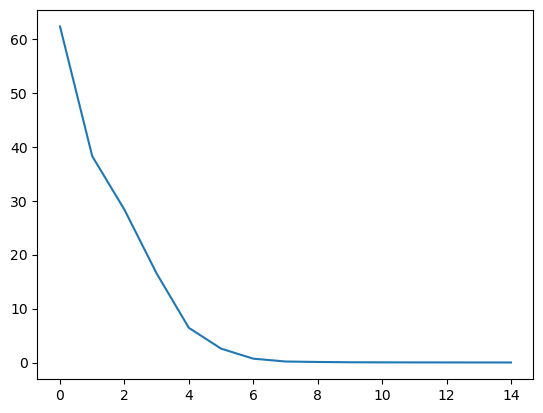

In [33]:
plt.plot(losses)

In [34]:
#create prediction and true label list
          
y_test_true = []
y_test_pred = []
# iterate over the test data
for i, data in enumerate(test_loader, 0):
    input_imgs, true_labels = data
    with torch.no_grad():
        pred_labels = model(input_imgs).round()
    
    y_test_true.extend(true_labels.numpy())
    y_test_pred.extend(pred_labels.numpy())

In [35]:
#y_test_pred.shape

acc = accuracy_score(y_test_true, np.argmax(y_test_pred, axis=1))
print(acc * 100)
# %% confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_true, np.argmax(y_test_pred, axis=1))
cm

95.0


array([[20,  0,  0],
       [ 0, 20,  0],
       [ 3,  0, 17]], dtype=int64)

In [36]:
print(y_test_pred)

[array([  0., -72., -35.], dtype=float32), array([  0., -68., -41.], dtype=float32), array([ -0., -28.,  -7.], dtype=float32), array([-46.,   0., -19.], dtype=float32), array([-34.,  -0., -16.], dtype=float32), array([-12., -15.,  -0.], dtype=float32), array([-34.,  -0., -16.], dtype=float32), array([-67.,  -0., -15.], dtype=float32), array([-46.,   0., -19.], dtype=float32), array([   0., -100.,  -54.], dtype=float32), array([-12., -47.,  -0.], dtype=float32), array([-34.,  -0., -16.], dtype=float32), array([  0., -42., -23.], dtype=float32), array([ -0., -23., -10.], dtype=float32), array([  0., -83., -49.], dtype=float32), array([-14., -23.,  -0.], dtype=float32), array([  0., -49., -28.], dtype=float32), array([-32.,  -0., -12.], dtype=float32), array([ -0., -10.,  -3.], dtype=float32), array([ -0., -38., -10.], dtype=float32), array([-25.,  -0., -13.], dtype=float32), array([ -0., -21.,  -9.], dtype=float32), array([-25.,  -0., -13.], dtype=float32), array([  0., -57., -32.], dtyp